In [1]:
import numpy as np
import math 
import matplotlib.pyplot as plt
from scipy.special import gamma, factorial

# Q1: Coin toss

Read section 2.1 of Sivia and recreate figure 2.3.

## (a)

Define the prior functions

In [2]:
def uniform_prior(H):
    if  H > 1 or H < 0:
        return 0
    
    return 1
    
first_prior = np.vectorize(uniform_prior)
    

def gaussian_prior(H):
    if  H > 1 or H < 0:
        return 0
    
    
    sigma = 0.03
    mu = 0.5
    
    return (1/(sigma*np.sqrt(2*np.pi)))*(np.exp(-1/2 * ((H-mu)/sigma)**2))

second_prior = np.vectorize(gaussian_prior)


def t_prior(H):
    if  H > 1 or H < 0:
        return 0

    alpha = 0.5
    betha = 0.5
    
    return (H**(alpha-1)*(1-H)**(betha-1))/((gamma(alpha)*gamma(betha))/gamma(alpha+betha))

third_prior = np.vectorize(t_prior)

### Bonus point

Why do we need to use np.vectorize here?

In [ ]:
# علت استفاده از این دستور دریافت ورودی به صورت لیست و انجام عملیات بر روی تک تک مولفه های لیست است.

## (b)

Create an array for H, calculte the priors, normalize them and then plot them.

In [3]:
H = np.linspace(0, 1, 1000, dtype=np.float128)
H3 = H[1:-1]

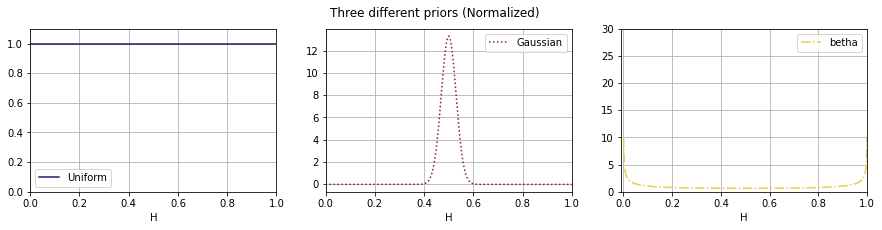

In [4]:
plt.figure(figsize=(15, 3))
plt.suptitle('Three different priors (Normalized)')

plt.subplot(1,3, 1)
plt.plot(H, first_prior(H), '-', color = '#191970', label = 'Uniform')
plt.xlim(0, 1)
plt.ylim(0, 1.1)
plt.xlabel('H')
plt.legend()
plt.grid()

plt.subplot(1,3, 2)
plt.plot(H, second_prior(H), ':', color = '#8B1A1A', label = 'Gaussian')
plt.xlim(0, 1)
#plt.ylim(0, 1.1)
plt.xlabel('H')
plt.legend()
plt.grid()

plt.subplot(1,3, 3)
plt.plot(H3, third_prior(H3), '-.', color = '#E3CF57', label = 'betha')
plt.xlim(-0.01, 1)
plt.ylim(0, 30)
plt.xlabel('H')
plt.legend()
plt.grid()

plt.show()

## (c)

Here we explicitly declared a data type for the array H. Although most of the times python does it for us, here was an example that we need to do it by hand to avoid round-off error. Find out what this error is and write a few lines about it (In Farsi or English) and explain what did we do to avoid it here. In other words, why did we use 'np.float128' exept just using 'float'?

You can also emit the data type decleration from the definition of H and see what happens in calculating the posterior.

In [ ]:
# اگر اعداد با این دقت ذخیره نشوند اتفاقی که برای نمودار ۱۵ ام از قسمت بعدی افتاده است بسیار زودتر می افتد.
# در محاسبه ی توزیع چند جمله ای
# H , 1-H
# وجود دارند که این در هم ضرب می شوند و مولفه های غیر صفر که با هم هم پوشانی دارند کم می شوند که در نتیجه همه چیز صفر می شود.

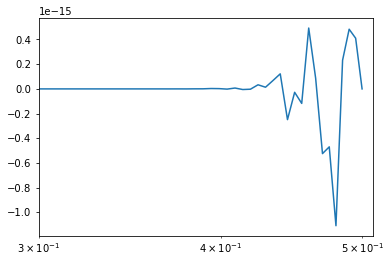

In [5]:
L1 = np.linspace(0, 0.5, 100)
L2 = np.linspace(0, 0.5, 100, dtype=np.float128)

P1 = second_prior(L1)
P2 = second_prior(L2)

plt.semilogx(L1, P2-P1)
plt.xlim(3*10**-1, 0.509)
#plt.semilogx(L1, L2-L1)

plt.show()

## (d)

Write a proper function to calculate the psterior for a given data and recreate the given plot.

In [6]:
data = [np.random.choice([0, 0, 0, 0, 0, 0, 0, 1, 1, 1], size=(i)) for i in range(4)]  
data.extend([np.random.choice([0, 0, 0, 0, 0, 0, 0, 1, 1, 1], size=(2**i)) for i in range(2, 13)])

In [7]:
def poster(d, pros, prior):
    
    data = np.array(d)
    nT = data.size
    nS = len(np.where(data == 1)[0])
    
    
    ld = np.float128(math.comb(nT, nS)) * pros**nS * ( 1 - pros)**(nT-nS) 
    post = ld * prior

    return post/max(post)

/var/folders/0r/_bwfkv0d2pq_v9pckt0x0jfr0000gn/T/ipykernel_6330/4216465578.py:11: RuntimeWarning: invalid value encountered in true_divide
  return post/max(post)
/var/folders/0r/_bwfkv0d2pq_v9pckt0x0jfr0000gn/T/ipykernel_6330/4216465578.py:11: RuntimeWarning: invalid value encountered in true_divide
  return post/max(post)
/var/folders/0r/_bwfkv0d2pq_v9pckt0x0jfr0000gn/T/ipykernel_6330/4216465578.py:11: RuntimeWarning: invalid value encountered in true_divide
  return post/max(post)


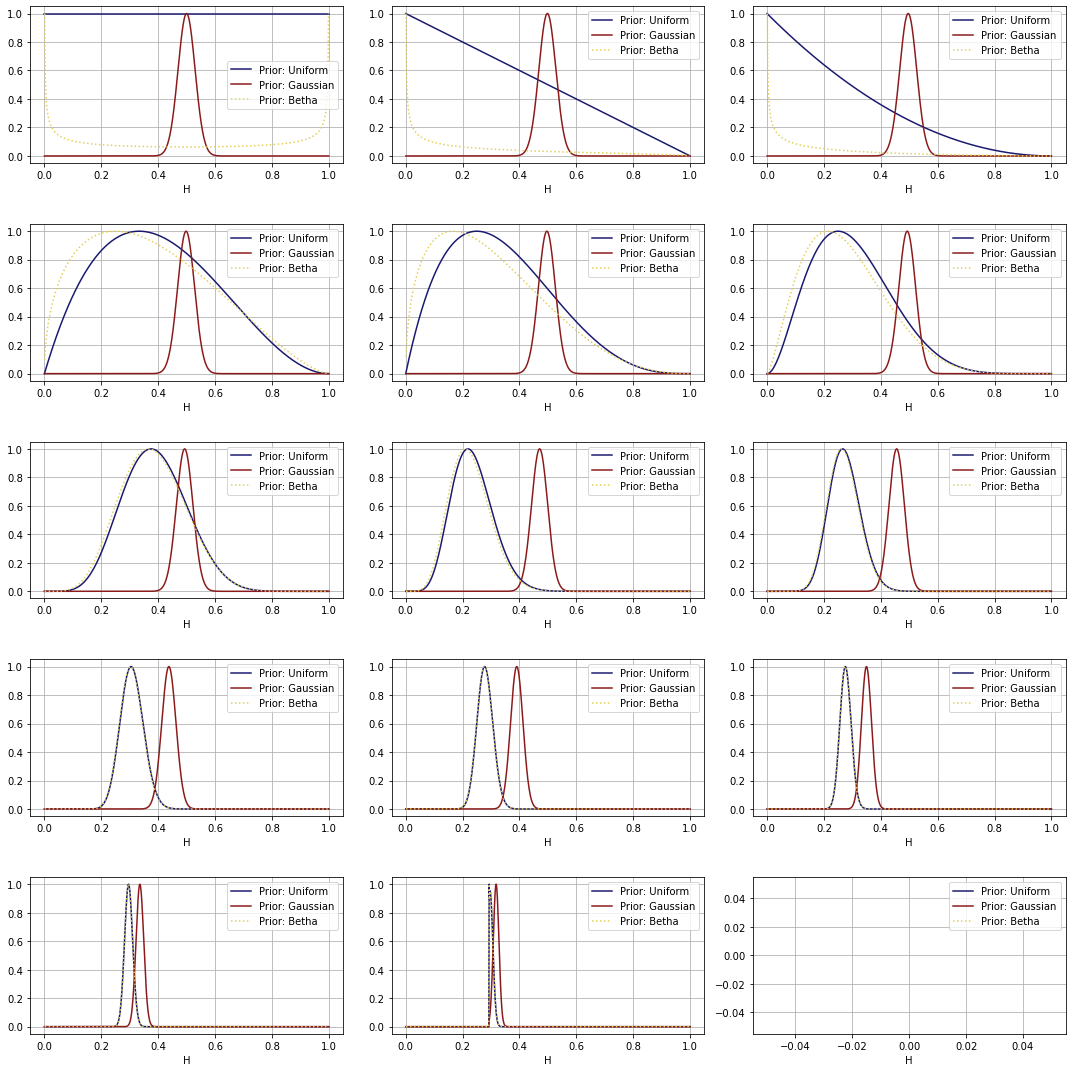

In [8]:
plt.figure(figsize=(15, 15))

for i in range(15):
    plt.subplot(5, 3, i+1)
    plt.plot(H, poster(data[i], H, first_prior(H)), color = '#191970', label = 'Prior: Uniform')
    plt.plot(H, poster(data[i], H, second_prior(H)), color = '#8B1A1A', label = 'Prior: Gaussian')
    plt.plot(H3, poster(data[i], H3, third_prior(H3)), ':', color = '#E3CF57', lw = 1.5, label = 'Prior: Betha')
    plt.xlabel('H')
    plt.legend()
    plt.grid()

plt.tight_layout(h_pad=3)
plt.show()

# Q2: Distributions and moments

## (a)

Write a function to calculate raw moments of a given distribution 

In [9]:
def rawMoment(n, x, pdf):
    a = np.zeros(n)
    if n == 1:
        
        meanC = np.sum(x*pdf)/np.sum(pdf)
        a[0] = meanC
        
        return a
    
    elif n == 2:
        
        meanC = np.sum(x*pdf)/np.sum(pdf)
        stdC = np.sqrt(np.sum(x**2 * pdf)/np.sum(pdf))
        
        a[0] = meanC
        a[1] = stdC 
        
        return a
    
    else:
        a = np.zeros(n)
        
        meanC = np.sum(x*pdf)/np.sum(pdf)
        stdC = np.sqrt(np.sum(x**2 * pdf)/np.sum(pdf))
        
        a[0] = meanC
        a[1] = stdC        
        
        for i in range(3, n+1):
            a[i-1] = np.sum((x**i * pdf)/np.sum(pdf))/stdC**i
        return  a

In [12]:
numPt = 100000
randPt = np.random.normal(loc = 2.1, scale=0.3, size=numPt)
nbins = 60
pdfR, binpdf = np.histogram(randPt, nbins, density = True)


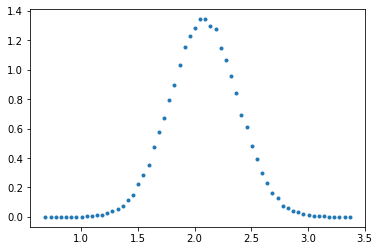

In [13]:
plt.plot(binpdf[0:-1], pdfR, '.') ; plt.show()

In [14]:
meanC = np.sum(binpdf[0:-1]*pdfR)/sum(pdfR)

In [15]:
meanC

2.077418635007478

In [16]:
stdC = np.sqrt(np.sum((binpdf[0:-1]-meanC)**2 * pdfR)/sum(pdfR))

In [17]:
stdC

0.2998382354739274

In [18]:
skewC = np.sum(((binpdf[0:-1]-meanC)**3 * pdfR)/sum(pdfR))/stdC**3

## (b)

Write a function to calculate central moments of a given distribution

In [19]:
def centMoment(n, x, pdf):
    a = np.zeros(n)
    if n == 1:
        
        meanC = np.sum(x*pdf)/np.sum(pdf)
        a[0] = meanC
        
        return a
    
    elif n == 2:
        
        meanC = np.sum(x*pdf)/np.sum(pdf)
        stdC = np.sqrt(np.sum((x-meanC)**2 * pdf)/np.sum(pdf))
        
        a[0] = meanC
        a[1] = stdC 
        
        return a
    
    else:
        a = np.zeros(n)
        
        meanC = np.sum(x*pdf)/np.sum(pdf)
        stdC = np.sqrt(np.sum((x-meanC)**2 * pdf)/np.sum(pdf))
        
        a[0] = meanC
        a[1] = stdC        
        
        for i in range(3, n+1):
            a[i-1] = np.sum(((x-meanC)**i * pdf)/np.sum(pdf))/stdC**i
        return  a

## (c)

Using numpy.random, create a binomial (p=0.7, n=$30$), a Poisson ($\mu$ = 2.1) and a gaussian ($\mu$ = 2.1, $\sigma = 0.3$) distribution with size $10^6$ and calculate their first 3 raw and central moments

In [20]:
numPt = 1000000
nbins = 60

# Binomial
randPtB = np.random.binomial(30, 0.7, numPt)
pdfB, binpdB = np.histogram(randPtB, nbins, density = True)

# Poisson
randPtP = np.random.poisson(2.1, numPt)
pdfP, binpdP = np.histogram(randPtP, nbins, density = True)

# Gaussian
randPtG = np.random.normal(loc = 2.1, scale=0.3, size=numPt)
pdfG, binpdG = np.histogram(randPtG, nbins, density = True)

In [21]:
rawMomB = rawMoment(4, binpdB[0:-1], pdfB)
centMomB = centMoment(4, binpdB[0:-1], pdfB)

rawMomP = rawMoment(4, binpdP[0:-1], pdfP)
centMomP = centMoment(4, binpdP[0:-1], pdfP)

rawMomG = rawMoment(4, binpdG[0:-1], pdfG)
centMomG = centMoment(4, binpdG[0:-1], pdfG)

## (d)

Using scipy.stats, calculate the first three moments of these distributions and check with the results from your own function. What does the function in scipy calculate? Raw moments or central moments?

In [22]:
#from scipy import stats
from scipy.stats import norm, skew, kurtosis

In [25]:
#Binomial
meanPb = np.mean(randPtB)
stdPb = np.std(randPtB)
skewPb = skew(randPtB)
kurtPb = kurtosis(randPtB, fisher=False)

print('Raw moments:', rawMomB)
print('Build-in: [', meanPb, ', ', stdPb, ', ', skewPb, ', ', kurtPb, ']')
print('Central moments:', centMomB)

Raw moments: [20.8315011  20.98035213  1.02070452  1.05506134]
Build-in: [ 20.999558 ,  2.513322065441674 ,  -0.16200013525996787 ,  2.963989424139424 ]
Central moments: [20.8315011   2.49474196 -0.16566253  3.05227311]


In [26]:
# Poisson
meanPp = np.mean(randPtP)
stdPp = np.std(randPtP)
skewPp = skew(randPtP)
kurtPp = kurtosis(randPtP, fisher=False)

print('Raw moments:', rawMomP)
print('Build-in: [', meanPp, ', ', stdPp, ', ', skewPp, ', ', kurtPp, ']')
print('Central moments:', centMomP)

Raw moments: [2.1001278  2.5512321  1.47991007 2.54572853]
Build-in: [ 2.100128 ,  1.4485345641771894 ,  0.6883374468267208 ,  3.4740369103490814 ]
Central moments: [2.1001278  1.44853321 0.68832083 3.47387924]


In [27]:
# Gaussian
meanPg = np.mean(randPtG)
stdPg = np.std(randPtG)
skewPg = skew(randPtG)
kurtPg = kurtosis(randPtG, fisher=False)

print('Raw moments:', rawMomG)
print('Build-in: [', meanPg, ', ', stdPg, ', ', skewPg, ', ', kurtPg, ']')
print('Central moments:', centMomG)

Raw moments: [2.07748103 2.09903552 1.03017449 1.08088821]
Build-in: [ 2.1004772254506903 ,  0.29975260260181524 ,  -0.000546041257508222 ,  2.9995212330343364 ]
Central moments: [ 2.07748103e+00  3.00037794e-01 -4.35022900e-04  2.99975278e+00]


In [ ]:
# توابع در پایتون ممان های مرکزی را محاسبه می کنند.

# Q3: Radioactive decay

The Poisson distribution is often used to describe situations in which an event occurs repeatedly at a constant rate of probability. An application of this distribution involves the decay of radioactive samples, but only in the approximation that the decay rate is slow enough that depletion in the population of the decaying species can be neglected.

Now suppose we have a data set showing the number of $\alpha$ particles emmited in 7.5 sec intervals:

## (a)

Load the provided data into a pandas data frame and show the data and then plot it's PDF.

In [287]:
import pandas as pd
import scipy.special

In [32]:
df = pd.read_csv('./data.txt', sep='\t')
df

,# time passed,number of events
0,7.5,232.0
1,15.0,240.0
2,22.5,245.0
3,30.0,226.0
4,37.5,223.0
...,...,...
2043,15330.0,265.0
2044,15337.5,220.0
2045,15345.0,252.0
2046,15352.5,229.0


In [44]:
df.columns

Index(['# time passed', 'number of events'], dtype='object')

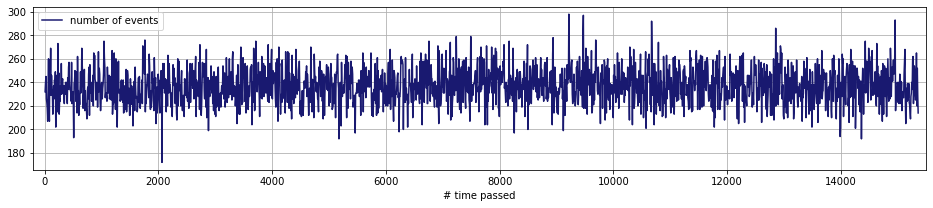

In [65]:
ax = df.plot(x='# time passed', y = 'number of events',color = '#191970',figsize=(16, 3)
        , grid=True, xlim=[-200, 15500])

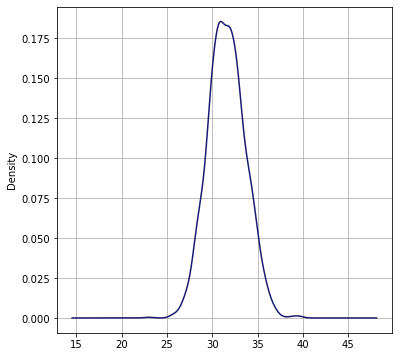

In [260]:
ax = (df['number of events']/7.5).plot.density(color = '#191970',figsize=(6, 6), grid=True
                                         , xlabel = 'number of events')

In [272]:
LPdf, nPdf = np.histogram(df['number of events']/7.5, 20, density = True)

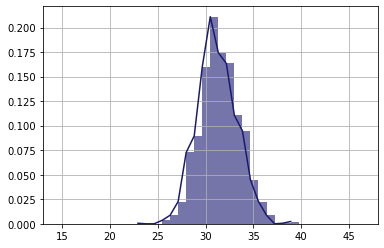

In [273]:
figuresize= (6, 6)
plt.plot(nPdf[0:-1], LPdf, color = '#191970')
plt.hist(df['number of events']/7.5, 20, density = True, color='#191970', alpha = 0.6)
plt.xlim(13, 48)
plt.grid()

plt.show()

## (b)

Calculate total number of decays and the average number of decays after each time interval. Then add the data to the Pandas DataFrame and show it. Then save the data to file 'new_data.txt'.

In [91]:
total_num = df['number of events'].sum()
total_num

485193.0

In [90]:
total_num/len(df)

236.91064453125

In [92]:
df['moving average'] = 0

In [94]:
for i in range(len(df)):
    if i==0:
        df.loc[i, 'moving average'] = df.loc[i, 'number of events']
    else:
        sumA = 0
        for j in range(i+1):
            sumA = sumA + df.loc[j, 'number of events']
        df.loc[i, 'moving average'] = sumA/(i+1)

In [96]:
df

,# time passed,number of events,moving average
0,7.5,232.0,232.000000
1,15.0,240.0,236.000000
2,22.5,245.0,239.000000
3,30.0,226.0,235.750000
4,37.5,223.0,233.200000
...,...,...,...
2043,15330.0,265.0,236.926614
2044,15337.5,220.0,236.918337
2045,15345.0,252.0,236.925709
2046,15352.5,229.0,236.921837


In [98]:
df.to_csv('new_data.txt', sep = '\t', index=False)

## (c)

Use a unifor prior and do the same analysis as question 1 to get the mean decay number per interval. Plot the diagrams as well. (Beware that this time we have a Poisson distribution rather than a binomial one)

In [441]:
minE = 0
maxE =  45
L = np.linspace(minE, maxE, 1000, dtype=np.float128)

In [442]:
def uniPr(l, mn, mx):
    if  l > mx or l < mn:
        return 0
    
    return 1/(mx-mn+1)
    
uniPrV = np.vectorize(uniPr)

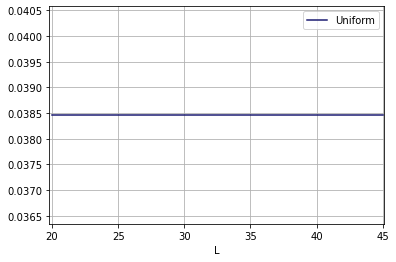

In [333]:
plt.plot(L, uniPrV(L, minE, maxE), '-', color = '#191970', label = 'Uniform')
plt.xlim(19.8, 45.1)
#plt.ylim(0, 1.1)
plt.xlabel('L')
plt.legend()
plt.grid()

In [334]:
def posD(d, tint, propos, prior):

    likelihood = ( propos ** (d/tint) * np.exp(-propos) ) / scipy.special.factorial(d/tint)
    post = likelihood * prior
    
    return post/np.max(post)

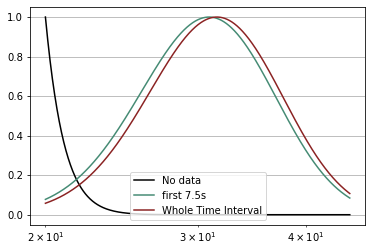

In [342]:
plt.plot(L, posD(0, 7.5, L, uniPrV(L, minE, maxE)), color = 'k', label = 'No data')
plt.plot(L, posD(df['moving average'][0], 7.5, L, uniPrV(L, minE, maxE)), color = '#458B74',label = 'first 7.5s')
plt.plot(L, posD(df['moving average'][2047], 7.5, L, uniPrV(L, minE, maxE)), color = '#8B2323', label = 'Whole Time Interval')
plt.xscale('log')
plt.legend(loc=8)
plt.grid()

# (d)

Use two different priors of your choise and repeat the analysis. Which of these three priors leads to an answer sooner?

In [361]:
# Gaussian
def gauPr(l):

    sigma = 1
    mu = 31
    
    return (1/(sigma*np.sqrt(2*np.pi)))*(np.exp(-1/2 * ((l-mu)/sigma)**2))

gauPrV = np.vectorize(gauPr)

In [413]:
# Weilbull
def weiPr(x):
    
    l = 31
    k = 20
    w = (k/l) * (x/l) ** (k-1) * np.exp(-(x/l)**k)
    
    return w

weiPrV = np.vectorize(weiPr)

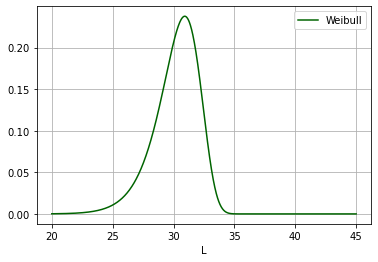

In [414]:
plt.plot(L, weiPr(L), '-', color = '#006400', label = 'Weibull')
#plt.xlim(19.8, 45.1)
#plt.ylim(0, 1.1)
plt.xlabel('L')
plt.legend()
plt.grid()

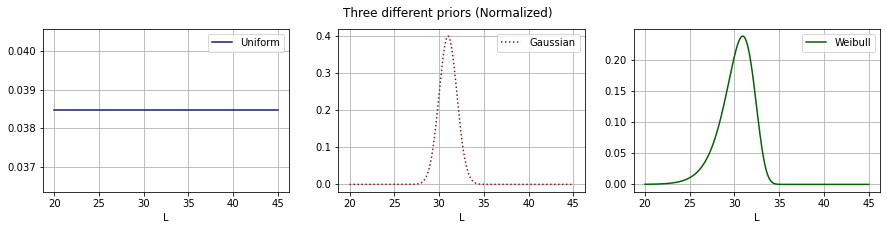

In [416]:
plt.figure(figsize=(15, 3))
plt.suptitle('Three different priors (Normalized)')

plt.subplot(1,3, 1)
plt.plot(L, uniPrV(L, minE, maxE), '-', color = '#191970', label = 'Uniform')
plt.xlabel('L')
plt.legend()
plt.grid()

plt.subplot(1,3, 2)
plt.plot(L, gauPrV(L), ':', color = '#8B1A1A', label = 'Gaussian')
plt.xlabel('L')
plt.legend()
plt.grid()

plt.subplot(1,3, 3)
plt.plot(L, weiPr(L), '-', color = '#006400', label = 'Weibull')
plt.xlabel('L')
plt.legend()
plt.grid()

plt.show()

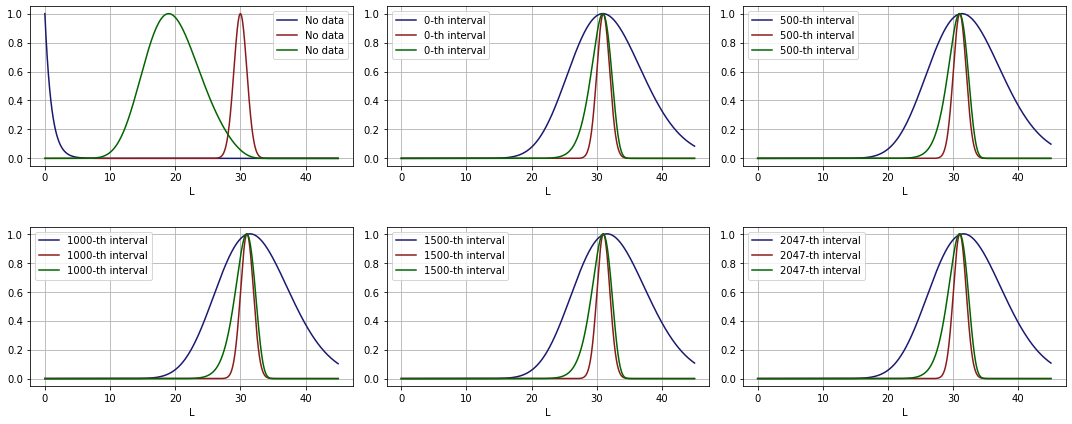

In [443]:
index = [-1, 0, 500, 1000, 1500, 2047]
j = 1
plt.figure(figsize=(15, 6))

for i in index:
    if i == -1:
        plt.subplot(2, 3, j)
        plt.plot(L, posD(0, 7.5, L, uniPrV(L, minE, maxE)), color = '#191970', label = 'No data')   
        plt.plot(L, posD(0, 7.5, L, gauPrV(L)), color = '#8B1A1A', label = 'No data')
        plt.plot(L, posD(0, 7.5, L, weiPrV(L)), color = '#006400', label = 'No data')
        plt.legend()
        plt.grid()
        plt.xlabel('L')
        j = j+1
    else:
        plt.subplot(2, 3, j)
        plt.plot(L, posD(df['moving average'][i], 7.5, L, uniPrV(L, minE, maxE)),
                 color = '#191970',label = '%s-th interval' %i )
        plt.plot(L, posD(df['moving average'][i], 7.5, L, gauPrV(L)), 
                 color = '#8B1A1A', label = '%s-th interval' %i)
        plt.plot(L, posD(df['moving average'][i], 7.5, L, weiPrV(L)), 
                 color = '#006400', label = '%s-th interval' %i)
        plt.legend()
        plt.grid()
        plt.xlabel('L')
        j = j+1


plt.tight_layout(h_pad=3)
plt.show()

In [ ]:
# اگر کدی که نوشتم درست باشد، در این مثال خاص و داده ها تفاوتی نمی کند که 
# prior 
# چه توزیعی داشته باشد و هر ۳ به با داشتن اول داده ها کم و بیش به رفتار نهایی خود همگرا می شوند، شاید علت پواسونی بودن
# likelihood
# است، چرا تابع پوسانی به شدت قوی است. 

## (e)

Now that you have the average decay per time interval, calculate the half life of this radioactive element (Suppose that the sample is large enough not to lose a noticable fraction of the particles in the span of the experiment). Can find out what this element is?

In [450]:
a = np.where( posD(df['moving average'][2047], 7.5, L, weiPrV(L))==1)[0]

In [455]:
rate = L[a]

In [456]:
rate

array([30.99099099], dtype=float128)

In [463]:
t1_2 = np.log(2)/rate
print(t1_2)

[0.02236609]


In [ ]:
# https://en.wikipedia.org/wiki/List_of_radioactive_nuclides_by_half-life
# Some Candidate would be: 
# - tennessine-293
# - polonium-191

# Bonus question

Do an error analysis and report how sure are you about the number you derived for the half life of the element.

In [ ]:
# No way!!!